# Name: Priti Chauhan
Batch: 1845

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
206,LP001693,Female,No,0,Graduate,No,3244,0.0,80.0,360.0,1.0,Urban,Y
364,LP002180,Male,No,0,Graduate,Yes,6822,0.0,141.0,360.0,1.0,Rural,Y
365,LP002181,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1.0,Rural,N
375,LP002211,Male,Yes,0,Graduate,No,4817,923.0,120.0,180.0,1.0,Urban,Y


# Data Analysis

In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dataset have total 614 entries.
It is having 614 Rows and Total 13 columns.
We can see 4 colunms are float, 1 is interger and 8 are object type.
Data having null vaues in gender. married, dependent, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History columns.
loan ID is unique ID it is Object type, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status are categorical values
Here we can see Dependents cannot be a object, its a numerical data, we will check this in further steps.
ApplicantIncome, CoapplicantIncome,LoanAmount, Loan_Amount_Term, Credit_History are Continuous data.

In [9]:
#Droping Loan ID column, as its not important for our analysis.
df.drop('Loan_ID', axis=1, inplace= True)

In [10]:
#to check missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Filling Null values
pd.set_option('display.max_rows', None)

In [12]:
df.isin(["3+"]).sum()

Gender                0
Married               0
Dependents           51
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.replace(to_replace="3+", value='3', inplace= True)

In [14]:
cat_features= df.select_dtypes(include=[np.object])
cat_features.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [15]:
for col in cat_features:
    print('\n%s column: '%col)
    print(df[col].value_counts())
    print('=='*16)


Gender column: 
Male      489
Female    112
Name: Gender, dtype: int64

Married column: 
Yes    398
No     213
Name: Married, dtype: int64

Dependents column: 
0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

Education column: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed column: 
No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area column: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status column: 
Y    422
N    192
Name: Loan_Status, dtype: int64


In [16]:
# filling null values in categorical column with mode imputation
df['Gender'].fillna(value='Male', inplace=True)

In [17]:
df['Married'].fillna(value='Yes', inplace=True)

In [18]:
df['Dependents'].fillna(value='0', inplace=True)

In [19]:
df['Self_Employed'].fillna(value='No', inplace=True)

In [20]:
# filling null vales in numerical columns
num_features= df.select_dtypes(include=[np.number])
num_features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [21]:
df['LoanAmount'].fillna(value=df['LoanAmount'].median(), inplace= True)

In [22]:
df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].median(), inplace= True)

In [23]:
df['Credit_History'].fillna(value=df['Credit_History'].median(), inplace= True)

In [24]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
df['Dependents']=df['Dependents'].astype(str).astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


In [27]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


# EDA and Visualization

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

Text(0.5, 1.0, 'Gender')

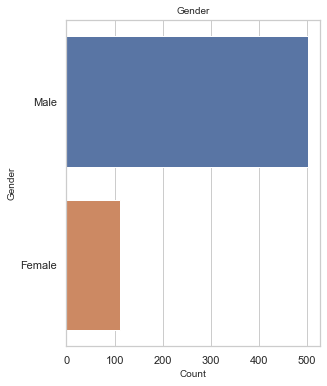

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(y=df['Gender'] )
plt.xlabel('Count', fontsize=10 )
plt.ylabel('Gender', fontsize=10 )
plt.title('Gender', fontsize=10)

Most of the population are male.

Text(0.5, 1.0, 'Married')

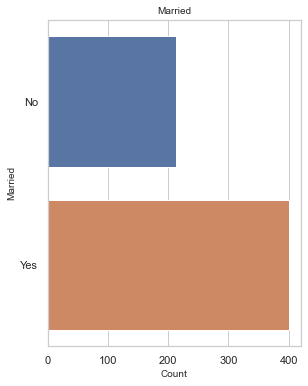

In [30]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(y=df['Married'] )
plt.xlabel('Count', fontsize=10 )
plt.ylabel('Married', fontsize=10 )
plt.title('Married', fontsize=10)

Mostly married pepole are applying for loans to fullfil their needs.

Text(0.5, 1.0, 'Education')

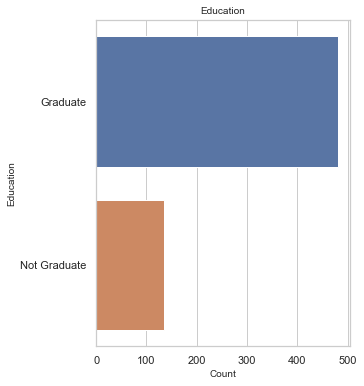

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(y=df['Education'] )
plt.xlabel('Count', fontsize=10 )
plt.ylabel('Education', fontsize=10 )
plt.title('Education', fontsize=10)

Most of the applicatnts are Graduate.
It indicates the chance of Graduate applicants to get approvel is high.

Text(0.5, 1.0, 'Self_Employed')

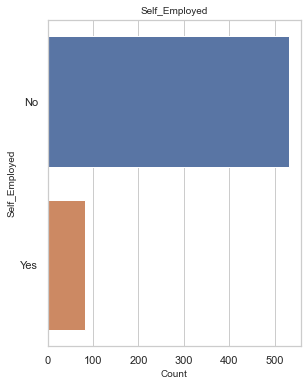

In [32]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(y=df['Self_Employed'] )
plt.xlabel('Count', fontsize=10 )
plt.ylabel('Self_Employed', fontsize=10 )
plt.title('Self_Employed', fontsize=10)

The chance to get loan approval is high for applicant who are workign professional or who are in jobs.

Text(0.5, 1.0, 'ApplicantIncome')

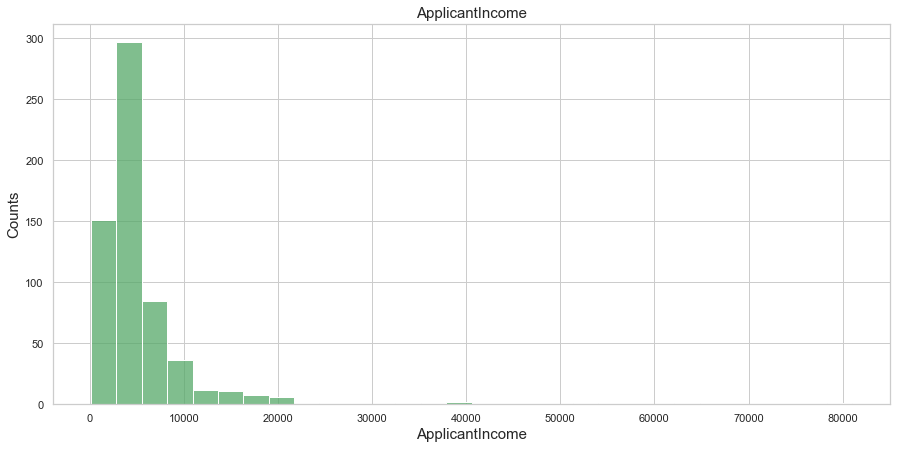

In [33]:
plt.figure(figsize=(15,7))

sns.histplot(num_features['ApplicantIncome'], bins= 30, color='g')
plt.xlabel('ApplicantIncome', fontsize=15 )
plt.ylabel('Counts', fontsize=15 )
plt.title('ApplicantIncome', fontsize=15)

Most of the applicants falls under 10000, very few are having income greater than 10000.

Text(0.5, 1.0, 'CoapplicantIncome')

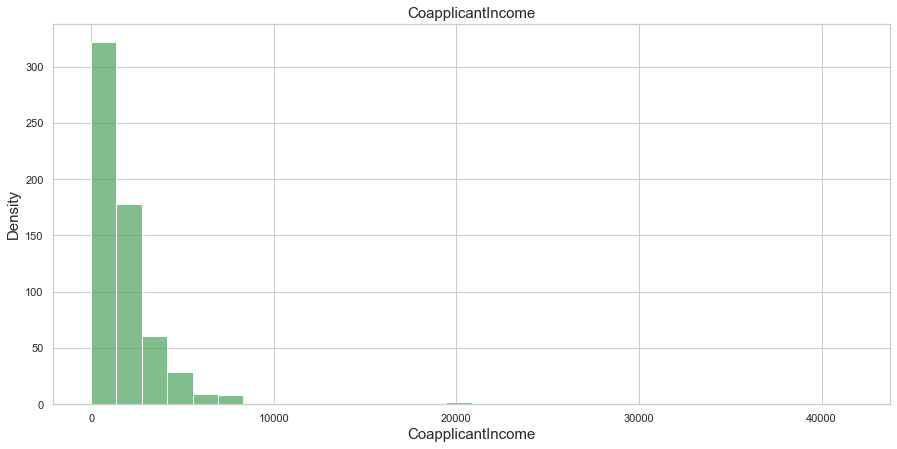

In [34]:
plt.figure(figsize=(15,7))

sns.histplot(num_features['CoapplicantIncome'], bins= 30, color='g')
plt.xlabel('CoapplicantIncome', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('CoapplicantIncome', fontsize=15)

Text(0.5, 1.0, 'LoanAmount')

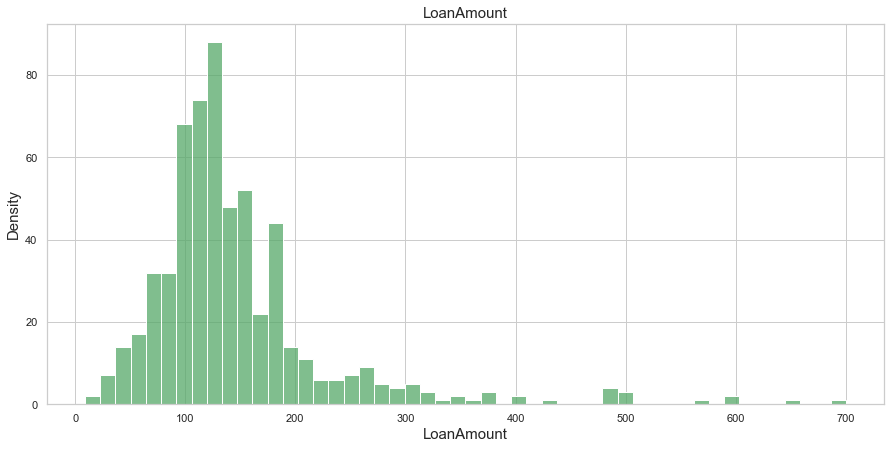

In [35]:
plt.figure(figsize=(15,7))

sns.histplot(num_features['LoanAmount'], bins= 50, color='g')
plt.xlabel('LoanAmount', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('LoanAmount', fontsize=15)

Here we can see most of the applicants apply loan in the range of 100-200, Loan number of applicants for loan values greater than 200 are less.

Text(0.5, 1.0, 'Loan_Amount_Term')

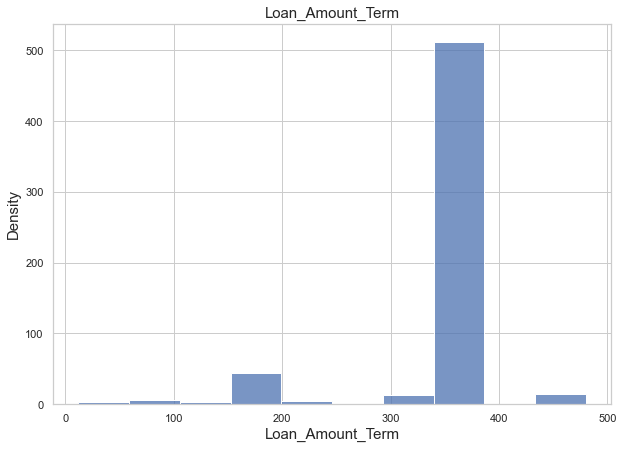

In [36]:
plt.figure(figsize=(10,7))

sns.histplot(num_features['Loan_Amount_Term'], bins= 10)
plt.xlabel('Loan_Amount_Term', fontsize=15 )
plt.ylabel('Density', fontsize=15 )
plt.title('Loan_Amount_Term', fontsize=15)

Most of the loan terms are lies between 350 to 400

Text(0.5, 1.0, 'Credit_History')

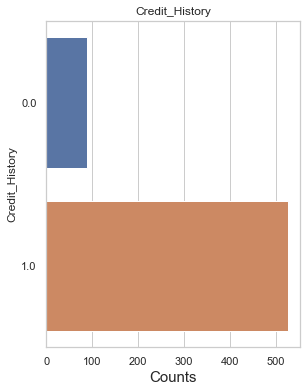

In [37]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(y=df['Credit_History'] )
plt.xlabel('Counts', fontsize=15 )
plt.ylabel('Credit_History', fontsize=12 )
plt.title('Credit_History', fontsize=12)


Majority of applicants have credit history.

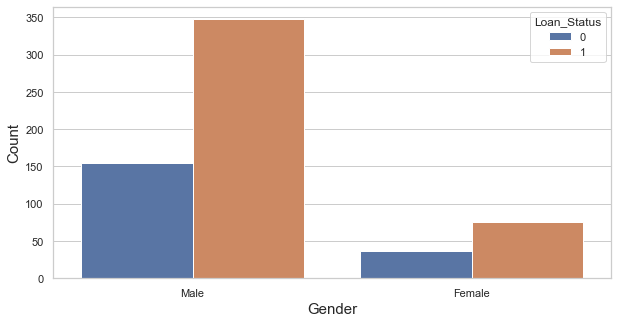

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(df['Gender'], hue='Loan_Status', data= df)
plt.xlabel('Gender', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.show()

Majority male apply for loan and the chance for getting approval is high.

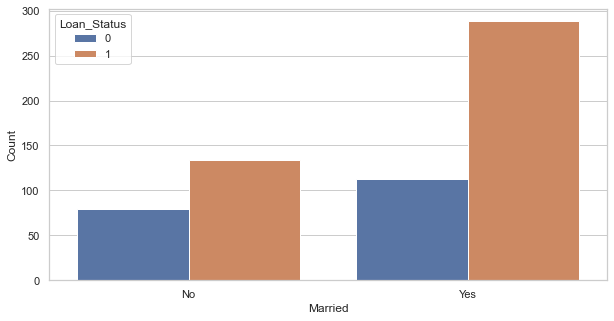

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(df['Married'], hue='Loan_Status', data= df)
plt.xlabel('Married', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.show()

Mostly married people are apply for loan and also they get it than others.

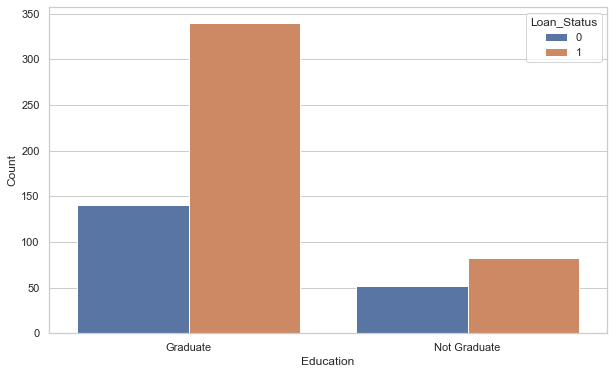

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(df['Education'], hue='Loan_Status', data= df)
plt.xlabel('Education', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.show()

Graduate Applicants are more applying for loan and also getting approval.

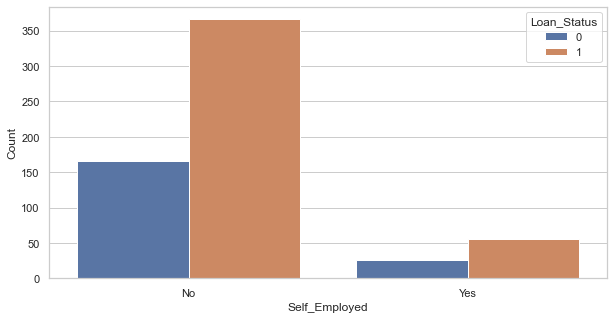

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(df['Self_Employed'], hue='Loan_Status', data= df)
plt.xlabel('Self_Employed', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.show()

To get approval for loan is low for Self_employed applicants.

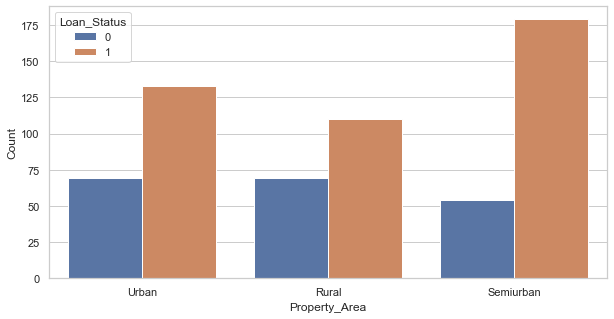

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(df['Property_Area'], hue='Loan_Status', data= df)
plt.xlabel('Property_Area', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.show()

Here we can see Applicants from Semiurban area are having higher chance for approval as numbers are high as compare to other Area.

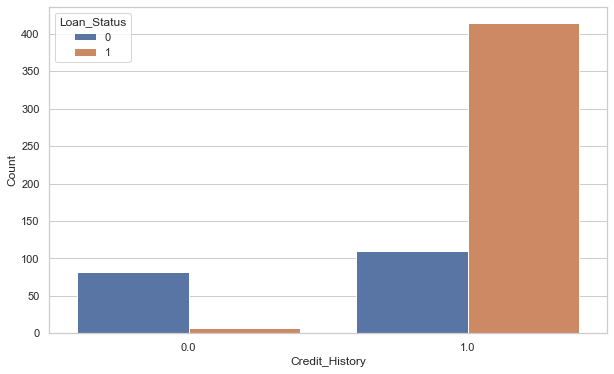

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(df['Credit_History'], hue='Loan_Status', data= df)
plt.xlabel('Credit_History', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.show()

Those applicants who have credit history are getting loan approval easily.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

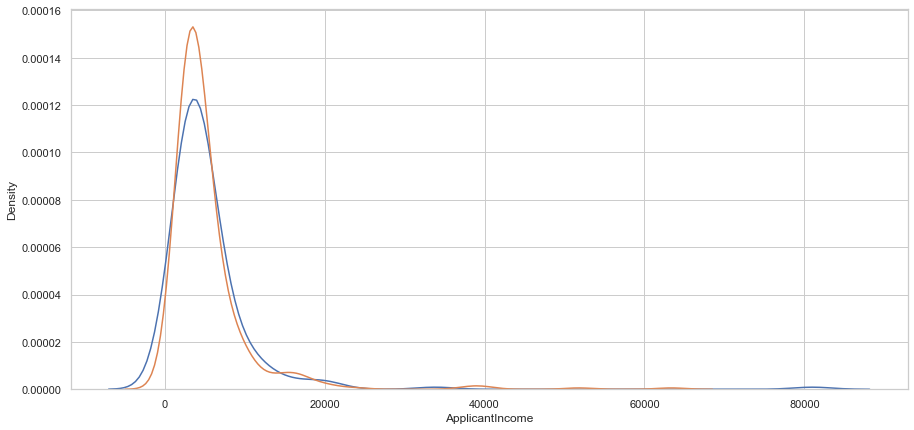

In [44]:
plt.figure(figsize=(15,7))
sns.distplot(df[df['Loan_Status']==0]['ApplicantIncome'], hist=False)
sns.distplot(df[df['Loan_Status']==1]['ApplicantIncome'], hist=False )

As the income increase chance of approval also increase.

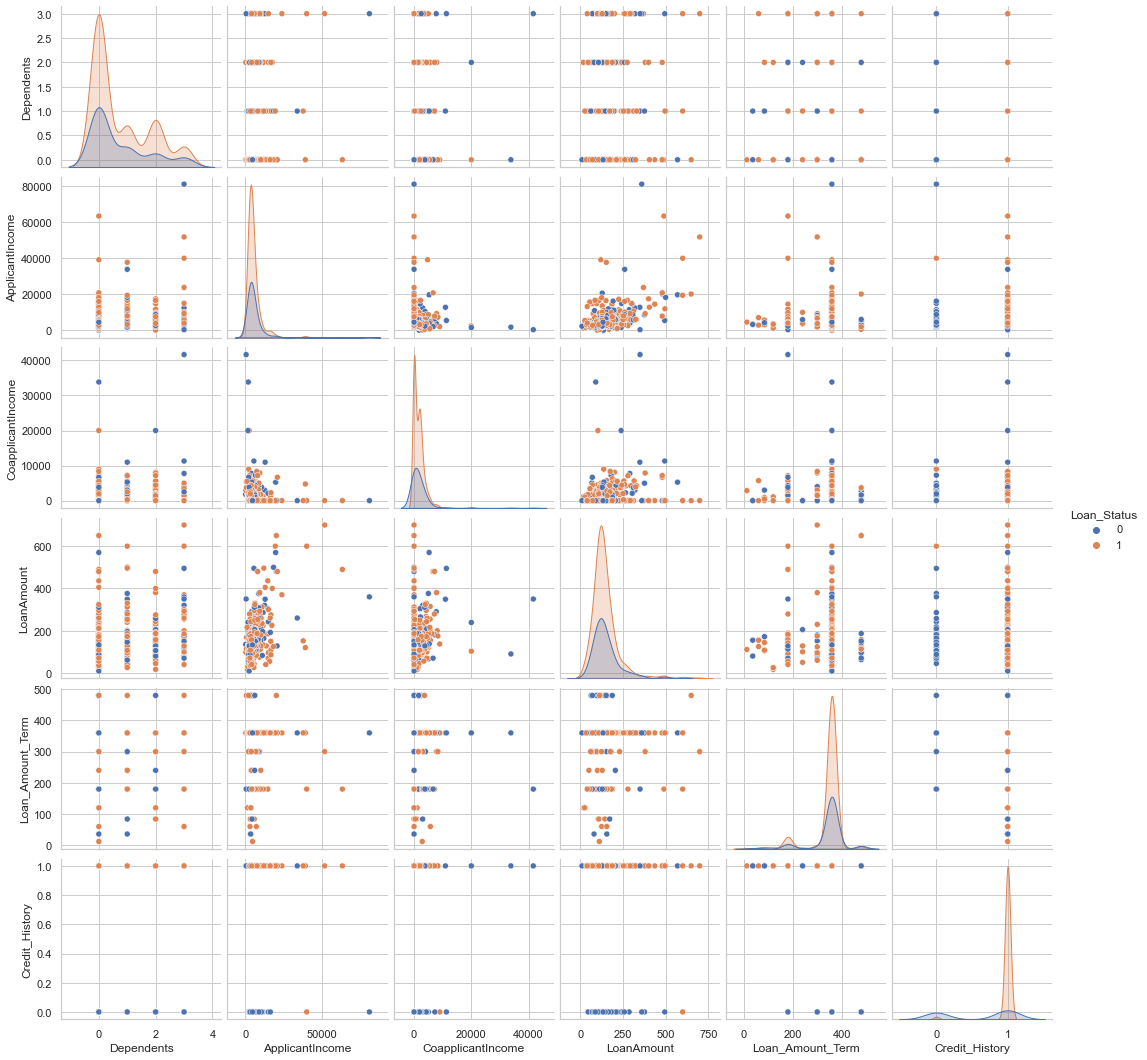

In [45]:
sns.pairplot(data=df, hue='Loan_Status')

# Preprocessing

In [46]:
# categorical columns needs to be scale
feature=df.drop(['Loan_Status'], axis=1)

In [47]:
target= df['Loan_Status']

In [48]:
newdf= pd.get_dummies(feature,sparse=False, drop_first=True )

In [49]:
newdf['Loan_Status']=target

In [50]:
newdf.shape

(614, 13)

In [51]:
newdf.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [52]:
newdf.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Dependents,1.000000,0.118202,0.030430,0.163103,-0.103864,-0.040160,0.172914,0.334216,0.055752,0.056798,0.001924,-0.001198,0.010118
ApplicantIncome,0.118202,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.058809,0.051708,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,0.030430,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.082912,0.075948,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.163103,0.565181,0.189218,1.000000,0.036960,-0.000607,0.106904,0.146546,-0.168759,0.115100,-0.005804,-0.036050,-0.033214
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.074030,-0.100912,-0.073928,-0.033739,0.059141,-0.094279,-0.022549
Credit_History,-0.040160,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.009170,0.010938,-0.073658,-0.001550,0.035976,-0.016934,0.540556
Gender_Male,0.172914,0.058809,0.082912,0.106904,-0.074030,0.009170,1.000000,0.364569,0.045364,-0.000525,-0.108623,0.034530,0.017987
Married_Yes,0.334216,0.051708,0.075948,0.146546,-0.100912,0.010938,0.364569,1.000000,0.012304,0.004489,0.005845,0.000546,0.091478
Education_Not Graduate,0.055752,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,0.045364,0.012304,1.000000,-0.010383,-0.039410,-0.034279,-0.085884
Self_Employed_Yes,0.056798,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.000525,0.004489,-0.010383,1.000000,0.008710,-0.030338,-0.003700


<AxesSubplot:>

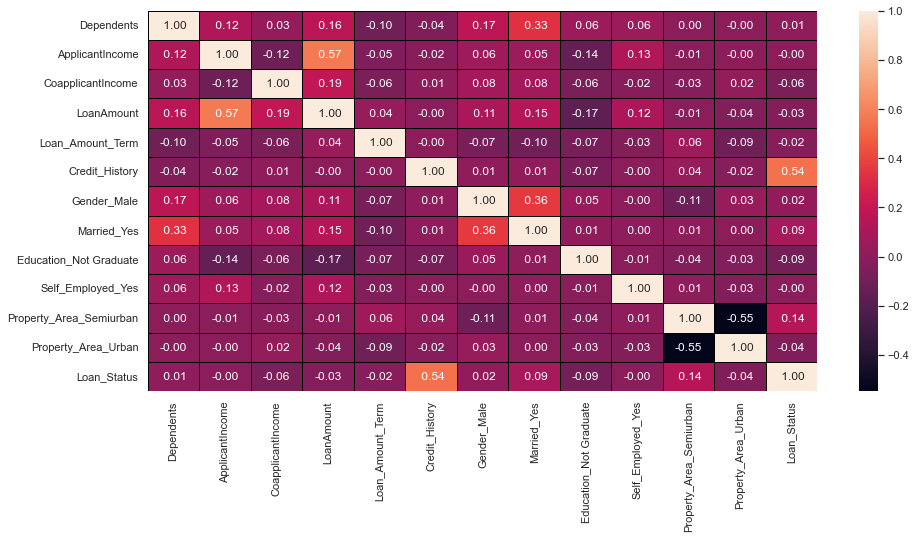

In [53]:
plt.figure(figsize=(15,7))
sns.heatmap(newdf.corr(), annot=True, linewidths=1,linecolor='black',fmt=' .2f')

Here we can see Credit history , Property area, Married, Gender and dependent having positive correlation, where as other have negative or zero corelation.

# Checkign outliers and skewness

<AxesSubplot:xlabel='ApplicantIncome'>

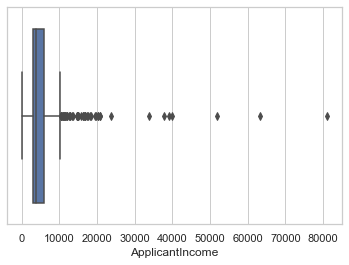

In [54]:
sns.boxplot('ApplicantIncome', data=newdf)

<AxesSubplot:xlabel='CoapplicantIncome'>

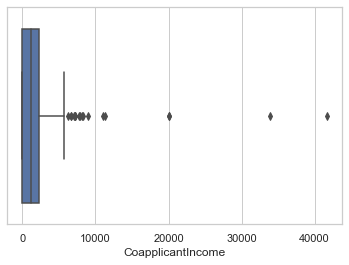

In [55]:
sns.boxplot('CoapplicantIncome', data=newdf)

<AxesSubplot:xlabel='LoanAmount'>

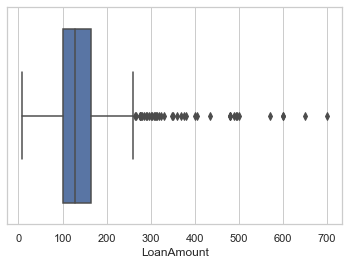

In [56]:
sns.boxplot('LoanAmount', data=newdf)

<AxesSubplot:xlabel='Loan_Amount_Term'>

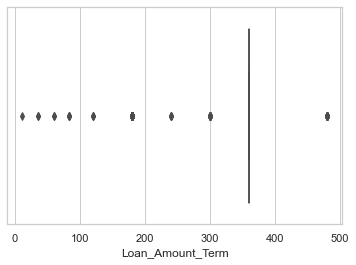

In [57]:
sns.boxplot('Loan_Amount_Term', data=newdf)

In [58]:
# to remove outliers
from scipy.stats import zscore
z= np.abs(zscore(newdf))
z

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.737806,0.072991,0.554487,0.211241,0.273231,0.411733,0.472343,1.372089,0.528362,0.392601,0.782016,1.428147,0.674519
1,0.253470,0.134412,0.038732,0.211241,0.273231,0.411733,0.472343,0.728816,0.528362,0.392601,0.782016,0.700208,1.482537
2,0.737806,0.393747,0.554487,0.948996,0.273231,0.411733,0.472343,0.728816,0.528362,2.547117,0.782016,1.428147,0.674519
3,0.737806,0.462062,0.251980,0.306435,0.273231,0.411733,0.472343,0.728816,1.892641,0.392601,0.782016,1.428147,0.674519
4,0.737806,0.097728,0.554487,0.056551,0.273231,0.411733,0.472343,1.372089,0.528362,0.392601,0.782016,1.428147,0.674519
5,1.244745,0.002218,0.880600,1.442758,0.273231,0.411733,0.472343,0.728816,0.528362,2.547117,0.782016,1.428147,0.674519
6,0.737806,0.503019,0.035995,0.603917,0.273231,0.411733,0.472343,0.728816,1.892641,0.392601,0.782016,1.428147,0.674519
7,2.236021,0.387850,0.301914,0.145737,0.273231,2.428760,0.472343,0.728816,0.528362,0.392601,1.278747,0.700208,1.482537
8,1.244745,0.228939,0.032575,0.264730,0.273231,0.411733,0.472343,0.728816,0.528362,0.392601,0.782016,1.428147,0.674519
9,0.253470,1.218457,3.196713,2.418499,0.273231,0.411733,0.472343,0.728816,0.528362,0.392601,1.278747,0.700208,1.482537


In [59]:
threshold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([2, 4, 4, 4, 1, 3, 4, 1, 3, 1, 3, 2, 3, 1, 1, 4, 4, 3, 3, 4, 1, 3,
       3, 2, 1, 2, 3, 1, 3, 4, 4, 3, 3, 3, 4, 3, 4, 2, 4, 2, 3],
      dtype=int64))


In [60]:
df=newdf[(z<3).all(axis=1)]
print(newdf.shape)
print(df.shape)

(614, 13)
(577, 13)


In [61]:
Loss_percentage=(614-577)/614*100
print(Loss_percentage)

6.026058631921824


In [62]:
df.skew()

Dependents                 1.052106
ApplicantIncome            2.148522
CoapplicantIncome          1.350517
LoanAmount                 1.151525
Loan_Amount_Term          -2.098806
Credit_History            -1.976043
Gender_Male               -1.622920
Married_Yes               -0.630211
Education_Not Graduate     1.306588
Self_Employed_Yes          2.252848
Property_Area_Semiurban    0.512963
Property_Area_Urban        0.736780
Loan_Status               -0.822635
dtype: float64

In [63]:
from sklearn.preprocessing import power_transform

In [64]:
df_s=df.iloc[:,0:6]

In [65]:
X=power_transform(df_s, method='yeo-johnson')

In [66]:
X=pd.DataFrame(data=X, columns=['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

In [67]:
df.drop(['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'], axis=1, inplace=True)

In [68]:
df=df.reset_index()

In [69]:
df['Dependents']=X['Dependents']

In [70]:
df['ApplicantIncome']=X['ApplicantIncome']

In [71]:
df['CoapplicantIncome']=X['CoapplicantIncome']

In [72]:
df['LoanAmount']=X['LoanAmount']

In [73]:
df['Loan_Amount_Term']=X['Loan_Amount_Term']

In [74]:
df['Credit_History']=X['Credit_History']

In [75]:
df

,index,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,1,1,-0.809243,0.681780,-1.122446,0.000771,0.130788,0.418513
1,1,1,1,0,0,0,0,0,0.902869,0.234783,0.744117,0.000771,0.130788,0.418513
2,2,1,1,0,1,0,1,1,-0.809243,-0.527201,-1.122446,-1.437336,0.130788,0.418513
3,3,1,1,1,0,0,1,1,-0.809243,-0.791972,0.895786,-0.153545,0.130788,0.418513
4,4,1,0,0,0,0,1,1,-0.809243,0.728848,-1.122446,0.238260,0.130788,0.418513
5,5,1,1,0,1,0,1,1,1.344671,0.540502,1.099231,2.009019,0.130788,0.418513
6,6,1,1,1,0,0,1,1,-0.809243,-0.970781,0.745881,-0.685554,0.130788,0.418513
7,7,1,1,0,0,1,0,0,1.533596,-0.506000,0.916572,0.527553,0.130788,-2.389415
8,8,1,1,0,0,0,1,1,1.344671,-0.009176,0.748075,0.688037,0.130788,0.418513
9,10,1,1,0,0,0,1,1,1.344671,-0.412326,0.495714,-1.321947,0.130788,0.418513


# Scaling the data by StandardScaler.

In [76]:
# Dividing into Feature and Target data
x=df.drop(['index', 'Loan_Status'],axis=1)
y=df['Loan_Status']

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sd=StandardScaler()
x=sd.fit_transform(x)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

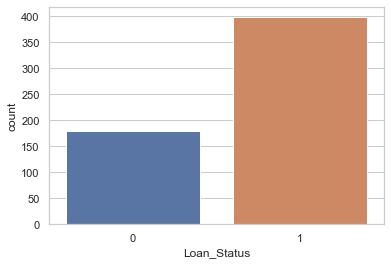

In [79]:
sns.countplot(y)

In [80]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [82]:
calc_vif(df)

,variables,VIF FACTOR
0,index,3.253711
1,Gender_Male,5.025090
2,Married_Yes,3.932471
3,Education_Not Graduate,1.354900
4,Self_Employed_Yes,1.194666
5,Property_Area_Semiurban,2.077696
6,Property_Area_Urban,1.867364
7,Loan_Status,4.262282
8,Dependents,1.129582
9,ApplicantIncome,1.760942


Vif is less than 10 we can proceed for model development

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [84]:
x.shape

(577, 12)

In [85]:
y.shape

(577,)

# Best random state
1. Logistic regression

In [86]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

In [87]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=801,test_size=0.20)

In [88]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.8362068965517241


In [89]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[19 19]
 [ 0 78]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        38
           1       0.80      1.00      0.89        78

    accuracy                           0.84       116
   macro avg       0.90      0.75      0.78       116
weighted avg       0.87      0.84      0.82       116



# CV score

In [90]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 80.76400903498654
Accuracy Score:- 83.62068965517241


at cv:- 3
Cross Validation scre is:- 81.45509499136442
Accuracy Score:- 83.62068965517241


at cv:- 4
Cross Validation scre is:- 81.45474137931035
Accuracy Score:- 83.62068965517241


at cv:- 5
Cross Validation scre is:- 81.63418290854572
Accuracy Score:- 83.62068965517241


at cv:- 6
Cross Validation scre is:- 81.27863688430699
Accuracy Score:- 83.62068965517241


at cv:- 7
Cross Validation scre is:- 81.46803240837916
Accuracy Score:- 83.62068965517241


at cv:- 8
Cross Validation scre is:- 81.6281392694064
Accuracy Score:- 83.62068965517241


at cv:- 9
Cross Validation scre is:- 81.80288461538461
Accuracy Score:- 83.62068965517241




at cv:- 9
Cross Validation scre is:- 81.80288461538461
Accuracy Score:- 83.62068965517241
At cv 9 model performing well but difference is high

# 2. SVC

In [91]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=9, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 82.75862068965517
Cross val Score : 81.80288461538461


In [92]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[19 19]
 [ 1 77]]
              precision    recall  f1-score   support

           0       0.95      0.50      0.66        38
           1       0.80      0.99      0.89        78

    accuracy                           0.83       116
   macro avg       0.88      0.74      0.77       116
weighted avg       0.85      0.83      0.81       116



Accuracy_core: 82.75862068965517
Cross val Score : 81.80288461538461
model is performing well.

# Ensemble Techniques
3. KNeighborsClassifier

In [93]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=9, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 78.44827586206897
Cross val Score : 77.4732905982906


In [94]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[20 18]
 [ 7 71]]
              precision    recall  f1-score   support

           0       0.74      0.53      0.62        38
           1       0.80      0.91      0.85        78

    accuracy                           0.78       116
   macro avg       0.77      0.72      0.73       116
weighted avg       0.78      0.78      0.77       116



accuracy_score: 78.44827586206897
Cross val Score : 77.4732905982906

Both accuracy score and Cross val score having less diffrence, as compare to SVC and logistic, KNeighborsClassifier is performing well.

# 4.  DecisionTreeClassifier

In [95]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=9, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 75.86206896551724
Cross val score is: 70.52617521367522


In [96]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[22 16]
 [12 66]]
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        38
           1       0.80      0.85      0.83        78

    accuracy                           0.76       116
   macro avg       0.73      0.71      0.72       116
weighted avg       0.75      0.76      0.75       116



accuracy_score 75.86206896551724
Cross val score is: 70.52617521367522
Both accuracy score and Cross val score having big diffrence, Model performance is bad.

# 5. RandomForestClassifier

In [97]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=9, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  81.03448275862068
Cross val Score : 79.89850427350427


In [98]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[21 17]
 [ 5 73]]
              precision    recall  f1-score   support

           0       0.81      0.55      0.66        38
           1       0.81      0.94      0.87        78

    accuracy                           0.81       116
   macro avg       0.81      0.74      0.76       116
weighted avg       0.81      0.81      0.80       116



accuracy_score:  81.03448275862068
Cross val Score : 79.89850427350427
Both the score are having very less diffrence as compare to other models, RandomForestClassifier performing good.

# 6. AdaBoostClassifier

In [99]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=9, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  81.89655172413794
Cross val Score : 79.21207264957265


In [100]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[20 18]
 [ 3 75]]
              precision    recall  f1-score   support

           0       0.87      0.53      0.66        38
           1       0.81      0.96      0.88        78

    accuracy                           0.82       116
   macro avg       0.84      0.74      0.77       116
weighted avg       0.83      0.82      0.80       116



accuracy_score:  81.89655172413794
Cross val Score : 79.21207264957265
Model performance good.

# 7. GaussianNB

In [101]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=9, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 82.75862068965517
Cross Val Score is : 81.28205128205128


In [102]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[19 19]
 [ 1 77]]
              precision    recall  f1-score   support

           0       0.95      0.50      0.66        38
           1       0.80      0.99      0.89        78

    accuracy                           0.83       116
   macro avg       0.88      0.74      0.77       116
weighted avg       0.85      0.83      0.81       116



Accuracy Score is: 82.75862068965517
Cross Val Score is : 81.28205128205128
Model performance is good,but SVC is still better.

# Hyper tuning parameter

In [105]:
rf=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', min_samples_split=2, n_estimators=500 )
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=9,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  79.3103448275862
Cross val Score : 79.20138888888889


In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters= {'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto','sqrt','log2'], 'min_samples_leaf':list(range(0,5))}
dt=DecisionTreeClassifier()
dtclf=GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dtclf.fit (x_train_b, y_train_b)
print(dtclf.best_params_) 

{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 4, 'splitter': 'random'}


In [112]:
dt=DecisionTreeClassifier(criterion='gini', max_features='auto', splitter= 'random', min_samples_leaf=4)
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=9, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 77.58620689655173
Cross val score is: 76.07905982905983


In [108]:
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':[1,3,4,5,7,9],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree', 'brute'], 'leaf_size':[10,20,30,40,50]}
kn=KNeighborsClassifier()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'uniform'}


In [113]:
kn=KNeighborsClassifier(algorithm='auto',leaf_size=10,  n_neighbors=7, weights='uniform')
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=9, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 81.03448275862068
Cross val Score : 79.02777777777777


In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters= {'C':[0.1,1.0,1.5,2,2.5],'kernel':[ 'linear','poly', 'rbf', 'sigmoid'], 'random_state': list(range(0,5)), 'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
svc=SVC()
clf=GridSearchCV(svc, param_grid=parameters, n_jobs=-1)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'C': 1.0, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}


In [115]:
scv=SVC(C=2.5,decision_function_shape='ovo', gamma='auto', kernel='rbf', random_state=0)
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=6, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 82.75862068965517
Cross val Score : 81.79768041237114


# SVC with Accuracy_core: 82.75862068965517, Cross val Score : 81.79768041237114 is our best model.

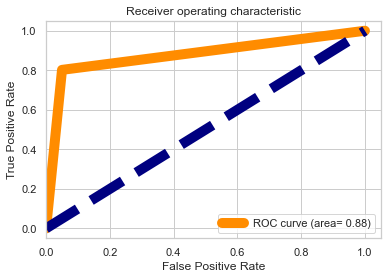

In [116]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(svc_pred, y_test_b)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [117]:
import pickle
filename="Loan_Application_Status_Prediction.pkl "
pickle.dump(svc, open(filename,'wb'))

In [118]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(svc.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,1
1,0,1
2,1,1
3,0,1
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1
